# Agenda
* Numpy
* Pandas
* Lab

# Introduction

## Create a new notebook for your code-along:

From our submission directory, type:

    jupyter notebook

From the Anaconda Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

More info: [http://scipy.org](http://scipy.org)

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [https://docs.scipy.org/doc/numpy-dev/user/quickstart.html](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)

## Numpy Overview

* Why Python for Data? Numpy brings **decades** of C Math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
import numpy as np

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items.

In [2]:
# Creating arrays
a = np.zeros((3))
b = np.ones((4, 3))
c = np.random.randint(1, 10, (5, 3, 4))
d = np.arange(0, 11, 3)

What are these functions?

    arange()

In [3]:
# Note the way each array is printed:
a, b, c, d

(array([ 0.,  0.,  0.]), array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]), array([[[2, 8, 6, 8],
         [2, 1, 7, 3],
         [8, 9, 9, 1]],
 
        [[7, 6, 5, 5],
         [1, 8, 8, 1],
         [5, 8, 2, 9]],
 
        [[4, 8, 2, 7],
         [1, 6, 4, 7],
         [4, 7, 1, 8]],
 
        [[6, 9, 8, 1],
         [8, 2, 9, 9],
         [1, 8, 7, 7]],
 
        [[2, 5, 7, 1],
         [9, 3, 9, 6],
         [7, 9, 1, 4]]]), array([0, 3, 6, 9]))

Let's try again

In [ ]:
a

In [ ]:
b

In [ ]:
c

In [ ]:
d

## Arithmetic in arrays is element wise

In [4]:
a = np.array( [20, 30, 40, 50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [ ]:
c = a - b
c

In [ ]:
b**2

## Indexing, Slicing and Iterating

In [ ]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [ ]:
a

In [ ]:
a[2:5]

# Multidimensional arrays use tuples with commas for indexing
# with (row, column) conventions beginning, as always in Python, from 0

In [5]:
np.random.seed(5)
b = np.random.randint(1, 100, (4, 4))

In [6]:
b

array([[79, 62, 17, 74],
       [ 9, 63, 28, 31],
       [81,  8, 77, 16],
       [54, 81, 28, 45]])

In [7]:
# Guess the output
print(b[2, 3])
print(b[0, 0])

16
79


In [8]:
b[0:3, 1], b[:, 1]

(array([62, 63,  8]), array([62, 63,  8, 81]))

In [9]:
b[1:3, :]

array([[ 9, 63, 28, 31],
       [81,  8, 77, 16]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* I/O

_pandas.pydata.org_

## Pandas Overview

Source: [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

In [10]:
import pandas as pd

In [11]:
dates = pd.date_range('20170101', periods = 6 , freq = 'M')
dates

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30'],
              dtype='datetime64[ns]', freq='M')

In [12]:
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns
print z

              A    B    C    D
2017-01-31  NaN  NaN  NaN  NaN
2017-02-28  NaN  NaN  NaN  NaN
2017-03-31  NaN  NaN  NaN  NaN
2017-04-30  NaN  NaN  NaN  NaN
2017-05-31  NaN  NaN  NaN  NaN
2017-06-30  NaN  NaN  NaN  NaN


In [ ]:
# Index, columns, underlying numpy data
df.T

In [ ]:
df

In [13]:
df2 = pd.DataFrame({'A' : 1.0,
                    'B' : pd.Timestamp('20170102'),
                    'C' : pd.Series(1, index = list(range(4)), dtype = 'float32'),
                    'D' : np.array([3] * 4, dtype = 'int32'),
                    'E' : 'foo'})
df2

,A,B,C,D,E
0,1.0,2017-01-02,1.0,3,foo
1,1.0,2017-01-02,1.0,3,foo
2,1.0,2017-01-02,1.0,3,foo
3,1.0,2017-01-02,1.0,3,foo


#### Viewing Data

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.index

In [ ]:
df.describe()

In [ ]:
df.sort_values(by = 'B')
df

### Selection

In [ ]:
df[['A', 'B']]

In [ ]:
df[0:3]

In [ ]:
# By label
df.loc[dates[0]]

In [ ]:
# multi-axis by label
df.loc[:, ['A','B']]

In [ ]:
# Date Range
df.loc['20170102':'20170104', ['B']]

In [ ]:
# Fast access to scalar
df.at[dates[1], 'B']

In [ ]:
# iloc provides integer locations similar to np style
df.iloc[3:]

### Boolean Indexing

In [ ]:
df[df.A < 0] # Basically a 'where' operation

### Setting

In [ ]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1 * df_posA

In [ ]:
df_posA

In [ ]:
# Setting new column aligns data by index
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20170102', periods = 6))

In [ ]:
s1

In [ ]:
df['F'] = s1

In [ ]:
df

### Missing Data

In [ ]:
# Add a column with missing data
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])

In [ ]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [ ]:
df1

In [ ]:
# find where values are null
pd.isnull(df1)

### Operations

In [ ]:
df

In [ ]:
df.mean(), df.mean(1) # Operation on two different axes

### Applying functions

In [14]:
df

,A,B,C,D
2017-01-31,0.789676,-0.769027,-0.182222,-0.239661
2017-02-28,-1.091583,3.286310,0.074531,0.556535
2017-03-31,1.972580,-0.241066,0.363376,1.074484
2017-04-30,-1.999947,0.958539,0.942202,0.568989
2017-05-31,0.928907,1.226388,0.631002,-0.963306
2017-06-30,1.789220,1.692540,1.106266,-1.612778


In [15]:
df.apply(np.cumsum)

,A,B,C,D
2017-01-31,0.789676,-0.769027,-0.182222,-0.239661
2017-02-28,-0.301907,2.517283,-0.107691,0.316874
2017-03-31,1.670673,2.276217,0.255685,1.391359
2017-04-30,-0.329274,3.234756,1.197887,1.960347
2017-05-31,0.599633,4.461144,1.828889,0.997041
2017-06-30,2.388853,6.153684,2.935155,-0.615737


In [16]:
df.apply(lambda x: x.max() - x.min())

A    3.972527
B    4.055337
C    1.288488
D    2.687262
dtype: float64

In [17]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [ ]:
np.random.randn(10, 4)

In [ ]:
# Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10, 4))
df

In [ ]:
# Break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

In [ ]:
pd.concat(pieces)

In [ ]:
# Also can "Join" and "Append"
df

### Grouping

In [18]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [19]:
df

,A,B,C,D
0,foo,one,-0.264879,-0.154695
1,bar,one,-0.213137,0.558467
2,foo,two,-0.184308,-1.522356
3,bar,three,0.423844,-0.892643
4,foo,two,-0.723062,0.624126
5,bar,two,-0.042419,-0.805184
6,foo,one,-0.907606,0.212280
7,foo,three,-0.744126,0.492354


In [ ]:
df.groupby(['A', 'B']).sum()

### Reshaping

In [ ]:
# You can also stack or unstack levels
a = df.groupby(['A','B']).sum()

In [ ]:
# Pivot Tables
pd.pivot_table(df, values = ['C', 'D'], index = ['A'], columns = ['B'])

### Time Series

In [22]:
import pandas as pd
import numpy as np

In [23]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2017', periods = 100, freq = 'S')

In [24]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index = rng)

In [25]:
ts

2017-01-01 00:00:00    210
2017-01-01 00:00:01    188
2017-01-01 00:00:02    347
2017-01-01 00:00:03     29
2017-01-01 00:00:04    216
2017-01-01 00:00:05    120
2017-01-01 00:00:06    225
2017-01-01 00:00:07    476
2017-01-01 00:00:08    207
2017-01-01 00:00:09    326
2017-01-01 00:00:10     35
2017-01-01 00:00:11    367
2017-01-01 00:00:12    276
2017-01-01 00:00:13    177
2017-01-01 00:00:14     72
2017-01-01 00:00:15    160
2017-01-01 00:00:16    210
2017-01-01 00:00:17     13
2017-01-01 00:00:18    220
2017-01-01 00:00:19    239
2017-01-01 00:00:20    146
2017-01-01 00:00:21    308
2017-01-01 00:00:22    337
2017-01-01 00:00:23     22
2017-01-01 00:00:24    314
2017-01-01 00:00:25    467
2017-01-01 00:00:26    372
2017-01-01 00:00:27    491
2017-01-01 00:00:28    348
2017-01-01 00:00:29    467
                      ... 
2017-01-01 00:01:10    491
2017-01-01 00:01:11    171
2017-01-01 00:01:12    100
2017-01-01 00:01:13    256
2017-01-01 00:01:14    130
2017-01-01 00:01:15    386
2

In [26]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2017-01-01 00:00:00    226.316667
2017-01-01 00:01:00    236.925000
Freq: T, dtype: float64

In [27]:
# Many additional time series features
ts.#use tab

SyntaxError: invalid syntax (<ipython-input-27-5c9240a56f62>, line 2)

### Plotting

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

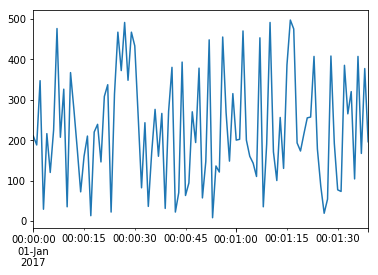

In [28]:
ts.plot()
plt.show()

In [29]:
def randwalk(startdate, points):
    ts = pd.Series(np.random.randn(points), index = pd.date_range(startdate, periods = points))
    ts = ts.cumsum()
    ts.plot()
    return(ts)

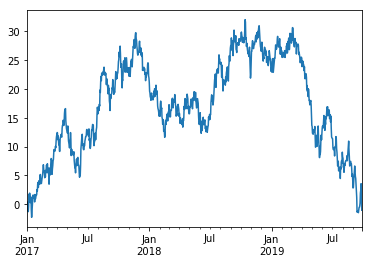

In [30]:
# Using pandas to make a simple random walker by repeatedly running:
a = randwalk('1/1/2017', 1000)

In [ ]:
# Pandas plot function will print with labels as default

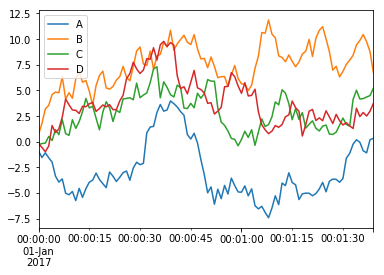

In [33]:
df = pd.DataFrame(np.random.randn(100, 4), index = ts.index, columns = ['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()
plt.legend(loc = 'best')
plt.show()

### I/O (Input / Output)
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
---|---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes and Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas
[PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/) | Coding conventions for the Python code comprising the standard library in the main Python distribution